# <center> RESTAURANT RECOMMENDATION SYSTEM </center>

# Index:

1. **[Loading Basic libraries](#1)**
2. **[Data Preprocessing & Exploratory data Analysis](#2)**
>A. **[Which are the top restaurant chains in Bengaluru](#A)**

## Importing libraries <a id ="1"></a> <br>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import spacy
import regex as re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel



import seaborn as sns
plt.style.use('ggplot')
#sns.set(style='whitegrid', palette='dark')

from geopy.geocoders import Nominatim

import folium
from folium.plugins import HeatMap
from wordcloud import WordCloud

import spacy
import sys
!{sys.executable} -m spacy download en

from spacy.lang.en.stop_words import STOP_WORDS
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding


You do not have sufficient privilege to perform this operation.



[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[x] Couldn't link model to 'en'
Creating a symlink in spacy/data failed. Make sure you have the required
permissions and try re-running the command as admin, or use a virtualenv. You
can still import the model as a module and call its load() method, or create the
symlink manually.
C:\Users\ehrikoh.ERICSSON\Anaconda3\lib\site-packages\en_core_web_sm -->
C:\Users\ehrikoh.ERICSSON\Anaconda3\lib\site-packages\spacy\data\en
[!] Download successful but linking failed
Creating a shortcut link for 'en' didn't work (maybe you don't have admin
permissions?), but you can still load the model via its full package name: nlp =
spacy.load('en_core_web_sm')


In [4]:
data=pd.read_csv('zomato.csv')
print(data.shape)
data.head()

(51717, 17)


url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

**The dataset is fairly large one with more than 50,000 rows and 17 features**

**Column descriptions:**


- **url** contains the url of the restaurant in the zomato website

- **address** contains the address of the restaurant in Bengaluru

- **name** contains the name of the restaurant

- **online_order** whether online ordering is available in the restaurant or not

- **book_table** table book option available or not

- **rate** contains the overall rating of the restaurant out of 5

- **votes** contains total number of rating for the restaurant as of the above mentioned date

- **phone** contains the phone number of the restaurant

- **location** contains the neighborhood in which the restaurant is located

- **rest_type** restaurant type

- **dish_liked** dishes people liked in the restaurant

- **cuisines** food styles, separated by comma

- **approx_cost(for two people)** contains the approximate cost for meal for two people

- **reviews_list** list of tuples containing reviews for the restaurant, each tuple

- **menu_item** contains list of menus available in the restaurant

- **listed_in(type)** type of meal

- **listed_in(city)** contains the neighborhood in which the restaurant is listed

## Data Preprocessing and EDA <a id ="2"></a>

### - Checking Null values

In [5]:
# Checking null values

data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

As seen above, there are lot of columns where values are null, let us check percentage of samples that are null below.

In [6]:
(data.isnull().mean()*100).sort_values(ascending=False)

dish_liked                     54.291626
rate                           15.033741
phone                           2.335789
approx_cost(for two people)     0.669026
rest_type                       0.438927
cuisines                        0.087012
location                        0.040606
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
listed_in(city)                 0.000000
votes                           0.000000
listed_in(type)                 0.000000
reviews_list                    0.000000
menu_item                       0.000000
url                             0.000000
dtype: float64

### - Dropping unnecessary columns

In [7]:
data.drop(columns=['dish_liked', 'phone', 'url'], axis=1, inplace=True)

In [8]:
data.head(3)

address             name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...            Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...  San Churro Cafe   

  online_order book_table   rate  votes      location            rest_type  \
0          Yes        Yes  4.1/5    775  Banashankari        Casual Dining   
1          Yes         No  4.1/5    787  Banashankari        Casual Dining   
2          Yes         No  3.8/5    918  Banashankari  Cafe, Casual Dining   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari

### - Checking for duplicated rows

In [9]:
data.duplicated().sum()

43

As seen above, there are some duplicated rows which needs to be removed, Let's check the shape of the dataset before and after removing duplicates to confirm.

In [10]:
# Shape of the data before removing duplicates
data.shape

(51717, 14)

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
# shape of the data after remvoing the duplicates
data.shape

(51674, 14)

### - Dropping NA values 

In [13]:
data.dropna(inplace=True, how='any')

In [14]:
# checking the shape of the dataset after removing the duplicates
data.shape

(43499, 14)

### - Checking column names

In [15]:
data.columns.to_list()

['address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'location',
 'rest_type',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

In [16]:
data.rename(columns={'approx_cost(for two people)': 'cost','listed_in(type)': 'type', 'listed_in(city)' : 'city'}, inplace=True)
data.head(3)

address             name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...            Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...  San Churro Cafe   

  online_order book_table   rate  votes      location            rest_type  \
0          Yes        Yes  4.1/5    775  Banashankari        Casual Dining   
1          Yes         No  4.1/5    787  Banashankari        Casual Dining   
2          Yes         No  3.8/5    918  Banashankari  Cafe, Casual Dining   

                         cuisines cost  \
0  North Indian, Mughlai, Chinese  800   
1     Chinese, North Indian, Thai  800   
2          Cafe, Mexican, Italian  800   

                                        reviews_list menu_item    type  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []  Buffet   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []  Buffet   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []  Buffet   

           city  
0  Banashankari  
1  Banashankari  
2  Banashankari

In [17]:
#confirming that data has no null values
data.isnull().sum().sum()

0

### - correcting column values

In [18]:
data['cost'].value_counts()

300      5707
400      5531
500      4295
200      3515
600      3341
250      2282
800      2201
700      1863
1,000    1562
150      1419
350      1409
450      1265
1,200     977
1,500     947
750       748
650       748
550       715
100       700
900       677
1,300     514
1,100     509
1,400     472
2,000     355
1,600     266
1,700     247
1,800     203
3,000     162
850       162
2,500     146
2,200      78
1,900      70
2,100      67
950        62
2,800      45
4,000      29
3,500      25
2,400      23
1,350      18
180        17
3,400      13
2,300      11
230        10
2,600      10
1,250       9
40          8
130         8
1,650       6
50          6
1,450       5
80          4
330         4
1,050       4
4,100       4
199         4
2,700       3
70          3
120         2
4,500       2
240         2
3,200       2
6,000       2
160         1
560         1
360         1
5,000       1
3,700       1
Name: cost, dtype: int64

As seen above, there commas in the cost which needs to be replaced with "."

In [19]:
data['cost']=data['cost'].astype(str).apply(lambda x: x.replace(",", ".")).astype(float)

In [20]:
data['cost'].value_counts()

300.00    5707
400.00    5531
500.00    4295
200.00    3515
600.00    3341
250.00    2282
800.00    2201
700.00    1863
1.00      1562
150.00    1419
350.00    1409
450.00    1265
1.20       977
1.50       947
650.00     748
750.00     748
550.00     715
100.00     700
900.00     677
1.30       514
1.10       509
1.40       472
2.00       355
1.60       266
1.70       247
1.80       203
850.00     162
3.00       162
2.50       146
2.20        78
1.90        70
2.10        67
950.00      62
2.80        45
4.00        29
3.50        25
2.40        23
1.35        18
180.00      17
3.40        13
2.30        11
230.00      10
2.60        10
1.25         9
130.00       8
40.00        8
50.00        6
1.65         6
1.45         5
1.05         4
80.00        4
330.00       4
199.00       4
4.10         4
70.00        3
2.70         3
6.00         2
4.50         2
3.20         2
240.00       2
120.00       2
160.00       1
3.70         1
560.00       1
360.00       1
5.00         1
Name: cost

In [21]:
data['rate'].value_counts(normalize=True)

NEW       0.050507
3.9/5     0.048024
3.7/5     0.046162
3.8/5     0.045909
3.9 /5    0.042875
3.8 /5    0.041817
3.7 /5    0.041357
3.6/5     0.040300
4.0/5     0.036713
4.0 /5    0.035564
3.6 /5    0.035242
4.1/5     0.033771
4.1 /5    0.033472
3.5/5     0.032713
3.5 /5    0.030805
3.4/5     0.028667
3.4 /5    0.027518
3.3/5     0.026368
4.2 /5    0.026230
3.3 /5    0.025863
4.2/5     0.023288
3.2/5     0.022920
4.3 /5    0.020920
3.1/5     0.019564
3.2 /5    0.019472
4.3/5     0.017748
3.1 /5    0.016069
4.4 /5    0.014414
3.0/5     0.012483
4.4/5     0.011931
3.0 /5    0.010276
2.9/5     0.009816
4.5 /5    0.009403
2.9 /5    0.008598
2.8/5     0.006943
2.8 /5    0.006391
4.5/5     0.005678
4.6 /5    0.004023
2.7/5     0.003839
2.6/5     0.003218
2.7 /5    0.003127
4.6/5     0.002874
2.6 /5    0.002506
4.7 /5    0.001977
4.7/5     0.001862
-         0.001494
2.5 /5    0.001287
2.5/5     0.001012
4.8 /5    0.000989
2.4/5     0.000828
2.4 /5    0.000690
4.9 /5    0.000690
2.3/5     0.

***As seen above, rating contains /5 in the rating which needs to be removed, also lot of "NEW" values need to be removed from consideration***

In [22]:
data=data[((data['rate']!='NEW') & (data['rate']!='-'))]
data.head()

address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes      location            rest_type  \
0          Yes        Yes  4.1/5    775  Banashankari        Casual Dining   
1          Yes         No  4.1/5    787  Banashankari        Casual Dining   
2          Yes         No  3.8/5    918  Banashankari  Cafe, Casual Dining   
3           No         No  3.7/5     88  Banashankari          Quick Bites   
4           No         No  3.8/5    166  Basavanagudi        Casual Dining   

                         cuisines   cost  \
0  North Indian, Mughlai, Chinese  800.0   
1     Chinese, North Indian, Thai  800.0   
2          Cafe, Mexican, Italian  800.0   
3      South Indian, North Indian  300.0   
4        North Indian, Rajasthani  600.0   

                                        reviews_list menu_item    type  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []  Buffet   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []  Buffet   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []  Buffet   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []  Buffet   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []  Buffet   

           city  
0  Banashankari  
1  Banashankari  
2  Banashankari  
3  Banashankari  
4  Banashankari

In [23]:
data['rate']=data['rate'].astype(str).apply(lambda x: x.replace("/5", "").strip()).astype(float)
data['rate'].value_counts()


3.9    3954
3.8    3816
3.7    3807
3.6    3286
4.0    3144
4.1    2925
3.5    2763
3.4    2444
3.3    2272
4.2    2154
3.2    1844
4.3    1682
3.1    1550
4.4    1146
3.0     990
2.9     801
4.5     656
2.8     580
2.7     303
4.6     300
2.6     249
4.7     167
2.5     100
2.4      66
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: rate, dtype: int64

In [24]:
data['rate_range']=pd.cut(data['rate'], bins=8)
data[['rate', 'rate_range']]

rate      rate_range
0       4.1  (3.738, 4.125]
1       4.1  (3.738, 4.125]
2       3.8  (3.738, 4.125]
3       3.7   (3.35, 3.738]
4       3.8  (3.738, 4.125]
5       3.8  (3.738, 4.125]
6       3.6   (3.35, 3.738]
7       4.6    (4.512, 4.9]
8       4.0  (3.738, 4.125]
9       4.2  (4.125, 4.512]
10      4.1  (3.738, 4.125]
11      4.2  (4.125, 4.512]
12      4.2  (4.125, 4.512]
13      4.0  (3.738, 4.125]
14      3.8  (3.738, 4.125]
15      3.8  (3.738, 4.125]
16      3.9  (3.738, 4.125]
17      3.8  (3.738, 4.125]
18      3.9  (3.738, 4.125]
19      3.1   (2.963, 3.35]
20      3.0   (2.963, 3.35]
21      3.7   (3.35, 3.738]
22      3.6   (3.35, 3.738]
23      3.6   (3.35, 3.738]
24      3.7   (3.35, 3.738]
25      3.2   (2.963, 3.35]
26      3.8  (3.738, 4.125]
27      3.3   (2.963, 3.35]
28      3.3   (2.963, 3.35]
29      3.8  (3.738, 4.125]
30      4.0  (3.738, 4.125]
31      2.8  (2.575, 2.963]
32      3.9  (3.738, 4.125]
33      3.9  (3.738, 4.125]
34      4.2  (4.125, 4.512]
35      3.9  (3.738, 4.125]
36      2.8  (2.575, 2.963]
37      4.2  (4.125, 4.512]
38      4.4  (4.125, 4.512]
39      4.0  (3.738, 4.125]
40      3.8  (3.738, 4.125]
41      3.9  (3.738, 4.125]
42      3.9  (3.738, 4.125]
43      3.9  (3.738, 4.125]
44      4.6    (4.512, 4.9]
45      3.8  (3.738, 4.125]
46      3.6   (3.35, 3.738]
47      4.0  (3.738, 4.125]
48      3.7   (3.35, 3.738]
49      3.1   (2.963, 3.35]
50      3.7   (3.35, 3.738]
51      4.1  (3.738, 4.125]
52      4.3  (4.125, 4.512]
53      4.0  (3.738, 4.125]
54      4.0  (3.738, 4.125]
55      3.9  (3.738, 4.125]
56      3.8  (3.738, 4.125]
57      4.2  (4.125, 4.512]
58      3.6   (3.35, 3.738]
59      3.7   (3.35, 3.738]
60      4.2  (4.125, 4.512]
61      3.6   (3.35, 3.738]
62      3.8  (3.738, 4.125]
63      4.0  (3.738, 4.125]
64      3.7   (3.35, 3.738]
65      4.1  (3.738, 4.125]
66      3.6   (3.35, 3.738]
67      4.1  (3.738, 4.125]
68      3.8  (3.738, 4.125]
69      3.2   (2.963, 3.35]
70      3.6   (3.35, 3.738]
71      4.1  (3.738, 4.125]
73      2.9  (2.575, 2.963]
74      3.6   (3.35, 3.738]
76      4.1  (3.738, 4.125]
77      3.6   (3.35, 3.738]
78      3.7   (3.35, 3.738]
79      3.8  (3.738, 4.125]
80      3.8  (3.738, 4.125]
81      4.2  (4.125, 4.512]
82      3.5   (3.35, 3.738]
83      3.8  (3.738, 4.125]
85      4.0  (3.738, 4.125]
86      4.4  (4.125, 4.512]
87      3.5   (3.35, 3.738]
88      3.5   (3.35, 3.738]
89      3.7   (3.35, 3.738]
93      3.2   (2.963, 3.35]
94      2.6  (2.575, 2.963]
95      3.3   (2.963, 3.35]
96      3.8  (3.738, 4.125]
97      3.7   (3.35, 3.738]
98      3.7   (3.35, 3.738]
99      3.8  (3.738, 4.125]
100     3.5   (3.35, 3.738]
101     3.7   (3.35, 3.738]
102     3.5   (3.35, 3.738]
103     3.8  (3.738, 4.125]
104     3.2   (2.963, 3.35]
105     3.5   (3.35, 3.738]
106     3.4   (3.35, 3.738]
108     3.2   (2.963, 3.35]
109     3.2   (2.963, 3.35]
111     3.1   (2.963, 3.35]
112     3.4   (3.35, 3.738]
119     3.1   (2.963, 3.35]
120     4.1  (3.738, 4.125]
121     3.3   (2.963, 3.35]
122     3.1   (2.963, 3.35]
123     3.3   (2.963, 3.35]
124     2.9  (2.575, 2.963]
127     3.3   (2.963, 3.35]
145     4.0  (3.738, 4.125]
146     3.0   (2.963, 3.35]
147     3.9  (3.738, 4.125]
148     4.1  (3.738, 4.125]
149     3.8  (3.738, 4.125]
150     3.8  (3.738, 4.125]
151     3.8  (3.738, 4.125]
152     4.1  (3.738, 4.125]
153     3.8  (3.738, 4.125]
155     4.1  (3.738, 4.125]
156     3.7   (3.35, 3.738]
157     3.9  (3.738, 4.125]
158     3.0   (2.963, 3.35]
159     3.7   (3.35, 3.738]
160     3.3   (2.963, 3.35]
161     3.3   (2.963, 3.35]
162     3.6   (3.35, 3.738]
163     3.3   (2.963, 3.35]
164     4.6    (4.512, 4.9]
165     4.1  (3.738, 4.125]
166     4.1  (3.738, 4.125]
167     3.7   (3.35, 3.738]
168     3.2   (2.963, 3.35]
169     4.0  (3.738, 4.125]
170     3.7   (3.35, 3.738]
171     3.5   (3.35, 3.738]
172     3.8  (3.738, 4.125]
173     3.8  (3.738, 4.125]
174     4.2  (4.125, 4.512]
175     3.6   (3.35, 3.738]
176

In [25]:
# calculating mean rating per restaurant as a new column
data['mean_rating']=data.groupby('name')['rate'].transform('mean')

In [26]:
data.head(20)

address  \
0   942, 21st Main Road, 2nd Stage, Banashankari, ...   
1   2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2   1112, Next to KIMS Medical College, 17th Cross...   
3   1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4   10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
5   37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...   
6   19/1, New Timberyard Layout, Beside Satellite ...   
7   2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
8   1, 30th Main Road, 3rd Stage, Banashankari, Ba...   
9   2470, 21 Main Road, 25th Cross, Banashankari, ...   
10  12,29 Near PES University Back Gate, D'Souza N...   
11  941, 3rd FLOOR, 21st Main, 22nd Cross, Banasha...   
12      6th Block, 3rd Stage, Banashankari, Bangalore   
13  111, Sapphire Toys Building, 100 Feet Ring Roa...   
14  1112, Next to KIMS Medical College, 17th Cross...   
15  2303, 21st Cross, K R Road, 2nd Stage, Banasha...   
16  241, 4th Floor, 100 Feet Ring Road, Opposite K...   
17  405, 24th Cross, 9th Main, 2nd Stage, Banashan...   
18  504, CJ Venkata Das Road, Padmanabhangar, 2nd ...   
19  47, 48 &49, 3Rd Floor, 21st Main Road, 2nd Sta...   

                                                 name online_order book_table  \
0                                               Jalsa          Yes        Yes   
1                                      Spice Elephant          Yes         No   
2                                     San Churro Cafe          Yes         No   
3                               Addhuri Udupi Bhojana           No         No   
4                                       Grand Village           No         No   
5                                     Timepass Dinner          Yes         No   
6     Rosewood International Hotel - Bar & Restaurant           No         No   
7                                              Onesta          Yes        Yes   
8                                      Penthouse Cafe          Yes         No   
9                                           Smacznego          Yes         No   
10  CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...          Yes         No   
11                                       Cafe Shuffle          Yes        Yes   
12                                   The Coffee Shack          Yes        Yes   
13                                         Caf-Eleven           No         No   
14                                    San Churro Cafe          Yes         No   
15                                      Cafe Vivacity          Yes         No   
16                                       Catch-up-ino          Yes         No   
17                                   Kirthi's Biryani          Yes         No   
18                                           T3H Cafe           No         No   
19                      360 Atoms Restaurant And Cafe          Yes         No   

    rate  votes      location            rest_type  \
0    4.1    775  Banashankari        Casual Dining   
1    4.1    787  Banashankari        Casual Dining   
2    3.8    918  Banashankari  Cafe, Casual Dining   
3    3.7     88  Banashankari          Quick Bites   
4    3.8    166  Basavanagudi        Casual Dining   
5    3.8    286  Basavanagudi        Casual Dining   
6    3.6      8   Mysore Road        Casual Dining   
7    4.6   2556  Banashankari  Casual Dining, Cafe   
8    4.0    324  Banashankari                 Cafe   
9    4.2    504  Banashankari                 Cafe   
10   4.1    402  Banashankari                 Cafe   
11   4.2    150  Banashankari                 Cafe   
12   4.2    164  Banashankari                 Cafe   
13   4.0    424  Banashankari                 Cafe   
14   3.8    918  Banashankari  Cafe, Casual Dining   
15   3.8     90  Banashankari                 Cafe   
16   3.9    133  Banashankari                 Cafe   
17   3.8    144  Banashankari                 Cafe   
18   3.9     93  Banashankari                 Cafe   
19   3.1     13  Banashankari                 Cafe   

           

### Which are the top restaurant chains in Bengaluru<a id='A'></a><br>

Text(0.5, 0, 'Number of outlets')

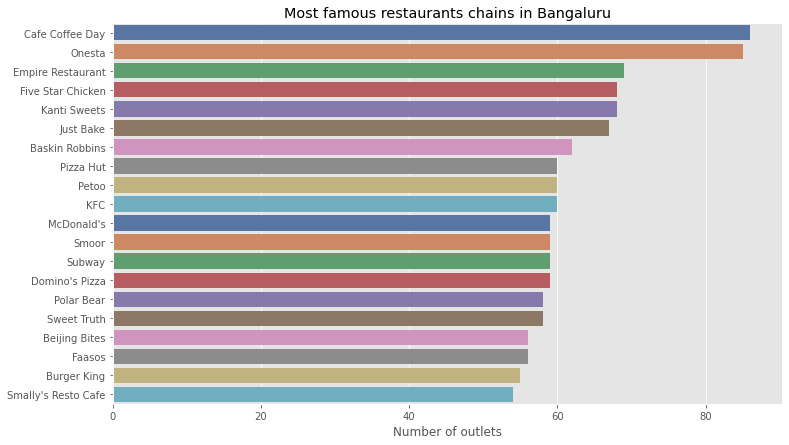

In [27]:
chains=data['name'].value_counts()[:20]
plt.figure(figsize=(12,7))
sns.barplot(x=chains, y=chains.index, palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")

As it can be seen above, **Cafe coffee day** and **Onesta** are the Top 2 restaurants

In [28]:
data[['online_order', 'book_table']].head()

online_order book_table
0          Yes        Yes
1          Yes         No
2          Yes         No
3           No         No
4           No         No

In [29]:
data['online_order'].value_counts(normalize=True)

Yes    0.656716
No     0.343284
Name: online_order, dtype: float64

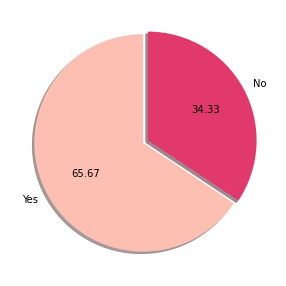

In [30]:
plt.figure(figsize=(8,5))
colors = ['#FEBFB3', '#E1396C']
plt.pie(data['online_order'].value_counts(),explode=[0,0.05], shadow=True, labels=data['online_order'].value_counts().index,autopct="%0.2f", startangle=90, colors=colors );

### What is the ratio b/w restaurants that provide and do not provide table booking ? <a id='C'></a>

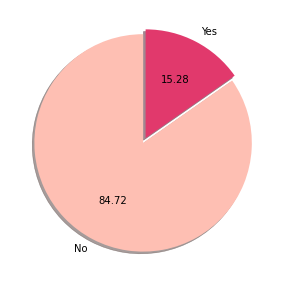

In [31]:
plt.figure(figsize=(8,5))
colors = ['#FEBFB3', '#E1396C']
plt.pie(data['book_table'].value_counts(),explode=[0,0.05], shadow=True, labels=data['book_table'].value_counts().index, autopct="%0.2f", startangle=90, colors=colors );

### Rating Distribution <a id="D"></a>

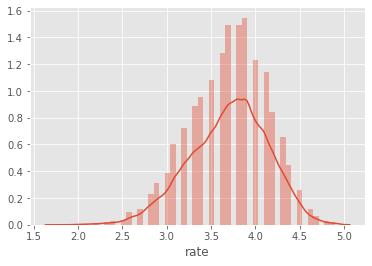

In [32]:
sns.distplot(data['rate'])

### Cost Vs Rating <a id="E"></a>

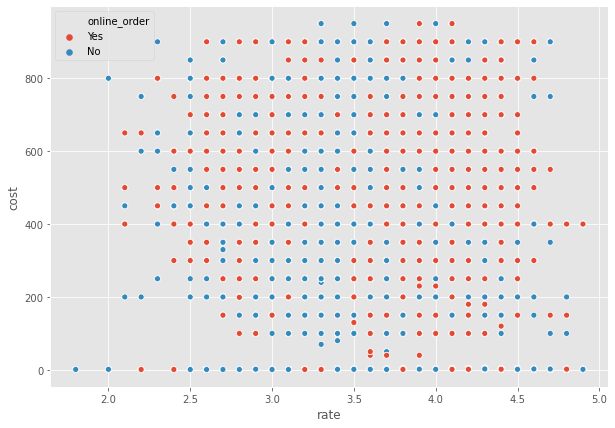

In [33]:
plt.figure(figsize=(10,7))
sns.scatterplot('rate','cost', data=data, hue='online_order')

In [34]:
data.head(1)

address   name online_order  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...  Jalsa          Yes   

  book_table  rate  votes      location      rest_type  \
0        Yes   4.1    775  Banashankari  Casual Dining   

                         cuisines   cost  \
0  North Indian, Mughlai, Chinese  800.0   

                                        reviews_list menu_item    type  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []  Buffet   

           city      rate_range  mean_rating  
0  Banashankari  (3.738, 4.125]     4.118182

### Cost Distribution <a id="F"></a>

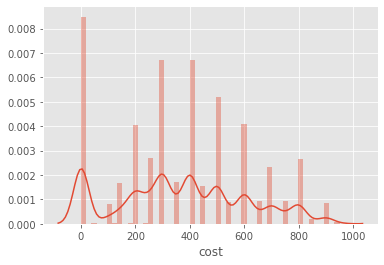

In [35]:
sns.distplot(data['cost'])

### Which are the most common restaurant type in Banglore? <a id="G"></a>

Text(0.5, 0, 'Number of outlets')

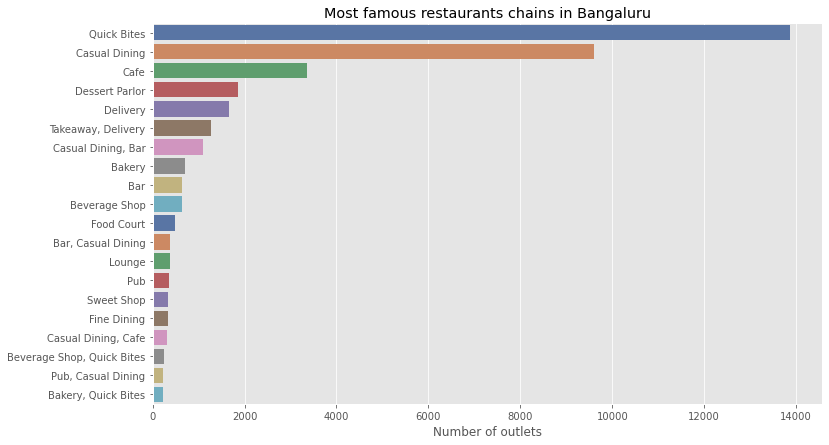

In [36]:
rests=data['rest_type'].value_counts()[:20]
plt.figure(figsize=(12,7))
sns.barplot(x=rests, y=rests.index, palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")

- No doubt about this as Banglore is known as the tech capital of India,people having busy and modern life will prefer Quick Bites.
- We can observe tha Quick Bites type restaurants dominates.

### Finding budget restaurants in any location <a id="H"></a>

In [37]:
# I will create a function to specify the budget restaurant, budget restaurant can be found out just by entering location, rest type

def find_budget_rest(loc, rest):
    tmp=data[(data['location']==loc) & (data['rest_type']==rest)]
    tmp=tmp[(tmp['cost']<=400) & (tmp['rate']>4.0)]
    return list(tmp['name'].unique())

In [38]:
find_budget_rest("BTM","Quick Bites")

['Swadista Aahar',
 'Litti Twist',
 'The Shawarma Shop',
 'Gorbandh',
 'Yum In My Tum',
 'Chaatimes',
 "Muthashy's",
 'Swad Punjab Da',
 "Domino's Pizza",
 'Roti Wala',
 'Andhra Kitchen']

### Which are the foodie areas? <a id="I"></a>

Text(0.5, 0, 'Number of restaurants')

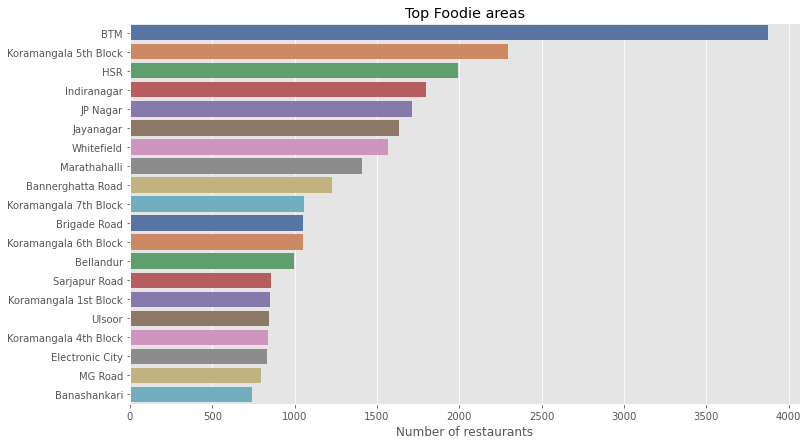

In [39]:
foodie=data['location'].value_counts()[:20]
plt.figure(figsize=(12,7))
sns.barplot(x=foodie, y=foodie.index, palette='deep')
plt.title("Top Foodie areas")
plt.xlabel("Number of restaurants")

- We can see that BTM,HSR and Koranmangala 5th block has the most number of restaurants.
- BTM dominates the section by having more than 5000 restaurants.

### Which are the most common cuisines in each locations? <a id="I"></a>

In [40]:
df_common=data.groupby(['location', 'cuisines'], as_index=False)['cuisines'].agg(['count']).reset_index().sort_values(by='count',ascending=False)
df_common=df_common.sort_values(by='count', ascending=False).groupby('location', as_index=False).head(3)
df_common.head(10)

location               cuisines  count
198                 BTM  North Indian, Chinese    336
184                 BTM           North Indian    241
6310         Whitefield           North Indian    134
987           Bellandur           North Indian    120
2832           JP Nagar           North Indian    118
658   Bannerghatta Road  North Indian, Chinese    114
2159                HSR           North Indian    111
4702       Marathahalli  North Indian, Chinese    108
4690       Marathahalli           North Indian    105
117                 BTM              Fast Food    103

### Extracting location information using Geopy <a id="J"></a>

In [41]:
locations=pd.DataFrame({"Name":data['location'].unique()})
locations['Name']=locations['Name'].apply(lambda x: "Bangalore " + str(x))
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)


locations['geo_loc']=lat_lon
locations.to_csv('locations.csv',index=False)

In [42]:
# changing back the name by replacing bangalore with ""
locations['Name']=locations['Name'].apply(lambda x: x.replace("Bangalore ",""))
locations.head()

Name                   geo_loc
0        Banashankari   (12.9152208, 77.573598)
1        Basavanagudi  (12.9417261, 77.5755021)
2         Mysore Road  (12.9069538, 77.4740266)
3           Jayanagar  (12.9292731, 77.5824229)
4  Kumaraswamy Layout  (12.9081487, 77.5553179)

- We have found out latitude and longitude of each location listed in the dataset using geopy.
- This is used to plot maps.

### Heatmap of restaurant count on each location <a id="K"></a>

##### Getting the location name with the count which we will plot on the map as a heatmap

In [43]:
rest_locations=pd.DataFrame(data['location'].value_counts().reset_index())
rest_locations.columns=['Name', 'count']
rest_locations=rest_locations.merge(locations, on='Name', how='left').dropna()
rest_locations.head()



Name  count                                  geo_loc
0                    BTM   3873  (12.911275849999999, 77.60456543431182)
1  Koramangala 5th Block   2296                 (13.2923988, 77.7519261)
2                    HSR   1993                 (12.9116225, 77.6388622)
3            Indiranagar   1800                 (12.9732913, 77.6404672)
4               JP Nagar   1710                 (12.9072515, 77.5782713)

In [44]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [45]:
rest_locations['lat'],rest_locations['long']=zip(*rest_locations['geo_loc'])
rest_locations.head()

Name  count                                  geo_loc  \
0                    BTM   3873  (12.911275849999999, 77.60456543431182)   
1  Koramangala 5th Block   2296                 (13.2923988, 77.7519261)   
2                    HSR   1993                 (12.9116225, 77.6388622)   
3            Indiranagar   1800                 (12.9732913, 77.6404672)   
4               JP Nagar   1710                 (12.9072515, 77.5782713)   

         lat       long  
0  12.911276  77.604565  
1  13.292399  77.751926  
2  12.911623  77.638862  
3  12.973291  77.640467  
4  12.907251  77.578271

In [46]:
basemap=generateBaseMap()
HeatMap(rest_locations[['lat','long','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [47]:
basemap

- It is clear that restaurants tend to concentrate in central bangalore area.
- The clutter of restaurants lowers are we move away from central.
- So,potential restaurant entrepreneurs can refer this and find out good locations for their venture.

### Which are the most popular cuisines of Bangalore? <a id="L"></a>

Text(0.5, 1.0, 'Most popular cuisines')

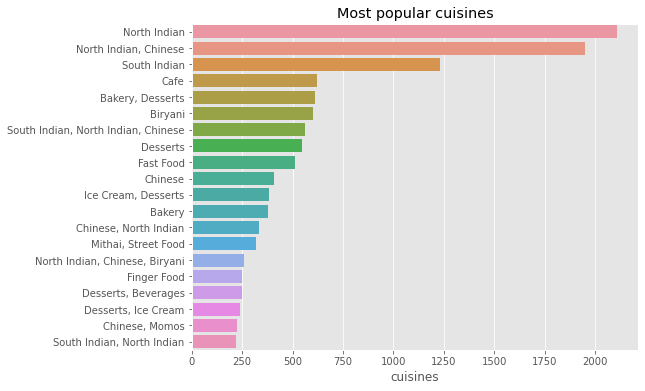

In [48]:
cuisines=data['cuisines'].value_counts().sort_values(ascending=False).head(20)
plt.figure(figsize=(8,6))
sns.barplot(x=cuisines, y=cuisines.index)
plt.title("Most popular cuisines")

### Heatmap of North Indian restaurants <a id="M"></a>

In [49]:
def data_generator(col_name, val_col):
    tmp_data=data[data[col_name]==val_col]
    tmp_data=tmp_data.groupby('location', as_index=False)['location'].agg(['count']).reset_index().sort_values(by='count',ascending=False)
    tmp_data=tmp_data.merge(rest_locations[['Name', 'lat', 'long']], left_on='location', right_on='Name', how='left').dropna()
    tmp_data=tmp_data[['Name', 'lat', 'long', 'count']]
    print(tmp_data.head())
    return tmp_data

In [50]:
North_india=data_generator("cuisines", "North Indian")

         Name        lat       long  count
0         BTM  12.911276  77.604565    241
1  Whitefield  12.969637  77.749745    134
2   Bellandur  12.979120  77.591300    120
3    JP Nagar  12.907251  77.578271    118
4         HSR  12.911623  77.638862    111


In [51]:
basemap=generateBaseMap()
HeatMap(North_india[['lat', 'long','count']].values.tolist(), zoom=20, radius=15).add_to(basemap)
basemap

- Interesting to see a cluster of North Indian Restaurants in South Bangalore area !
- This may indicate that these areas are more populated by North Indians.

### What about South Indian cuisines? <a id='M'></a>

In [52]:
food=data_generator('cuisines','South Indian')
basemap=generateBaseMap()
HeatMap(food[['lat','long','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

           Name        lat       long  count
0     Jayanagar  12.929273  77.582423     86
1  Basavanagudi  12.941726  77.575502     84
2           BTM  12.911276  77.604565     59
3           HSR  12.911623  77.638862     56
4  Banashankari  12.915221  77.573598     55


- They tend to span all over Bangalore.
- South Indian cuisines tend to cluster near central Bangalore.

### Wordcloud of  cuisines. <a id="O"></a>

In [53]:
data.head(1)

address   name online_order  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...  Jalsa          Yes   

  book_table  rate  votes      location      rest_type  \
0        Yes   4.1    775  Banashankari  Casual Dining   

                         cuisines   cost  \
0  North Indian, Mughlai, Chinese  800.0   

                                        reviews_list menu_item    type  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []  Buffet   

           city      rate_range  mean_rating  
0  Banashankari  (3.738, 4.125]     4.118182

In [54]:
resttype=data['rest_type'].value_counts()[:9].index
resttype

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery',
       'Takeaway, Delivery', 'Casual Dining, Bar', 'Bakery', 'Bar'],
      dtype='object')

In [55]:
def produce_wordcloud(temp):
    plt.figure(figsize=(20,30))
    for i,r in enumerate(temp):
        plt.subplot(3,3,i+1)
        corpus=data[data['rest_type']==r]['cuisines'].values.tolist()
        corpus=','.join(x for x in corpus)
        #print(corpus)
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1500, height=1500).generate(corpus)
        plt.imshow(wordcloud)
        plt.title(r)
        plt.axis("off")

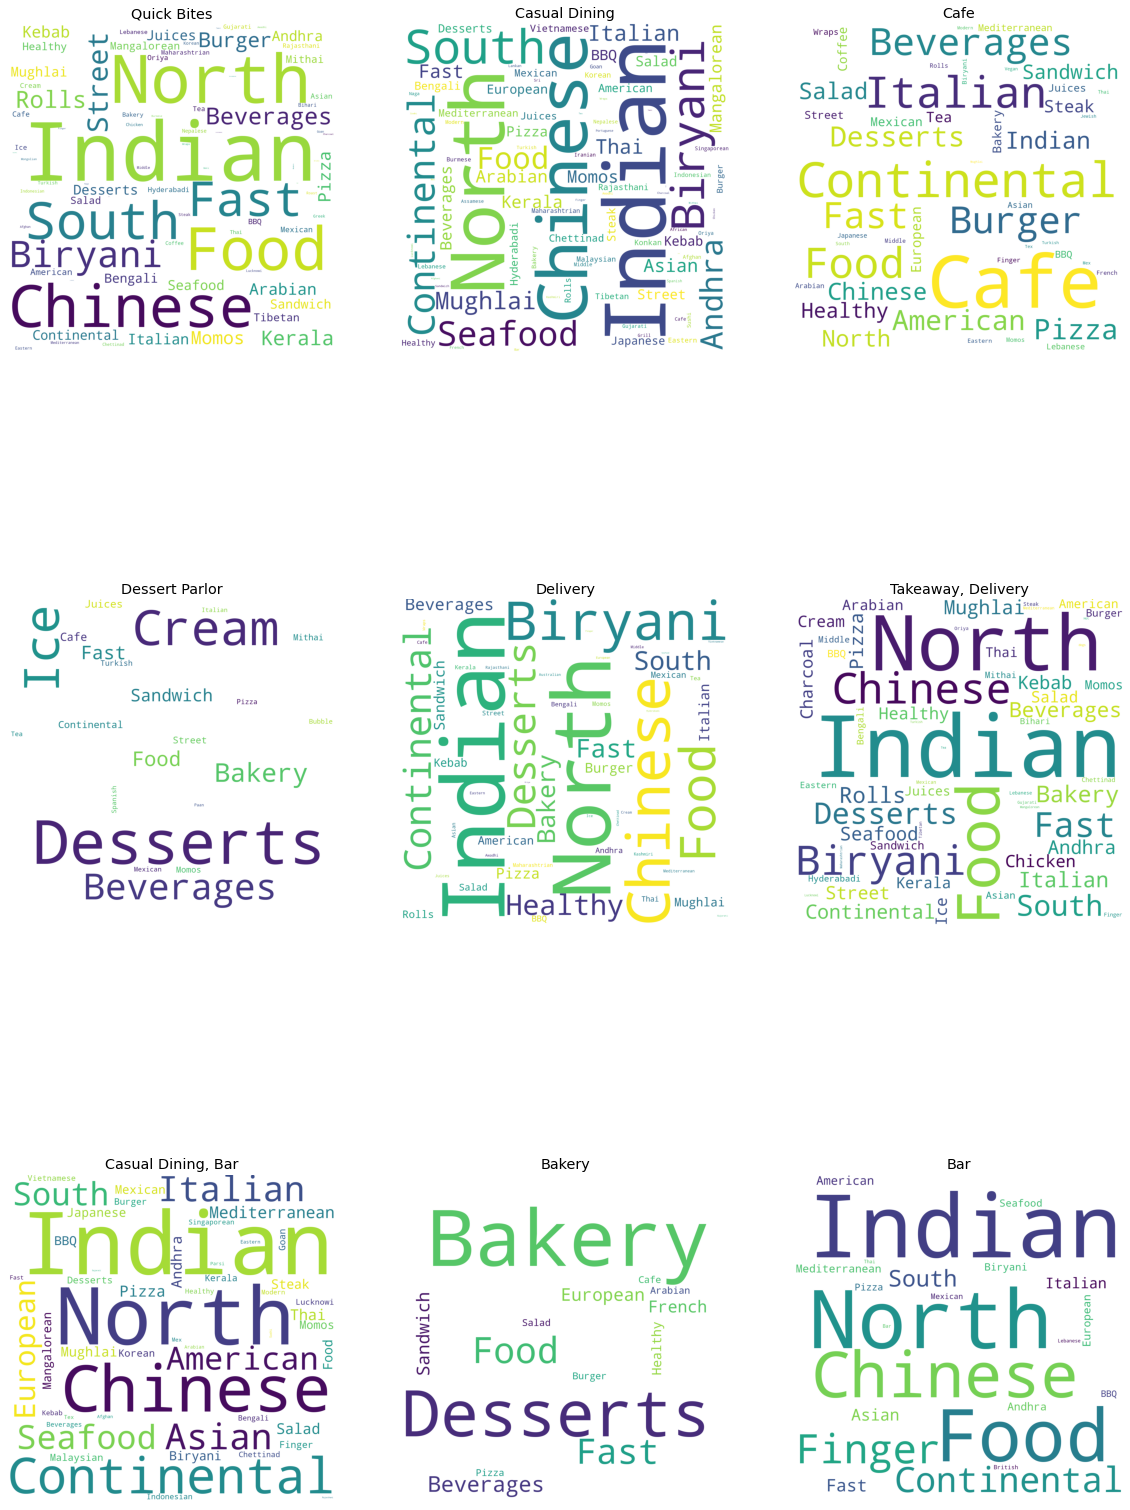

In [56]:
produce_wordcloud(resttype)

### Text preprocessing

#### Below are the text processing actions that will be taken
- Changing to lower case characters
- Removing punctuations
- Stop words removal
- URL removals


In [57]:
len(data['reviews_list'])

41237

In [58]:
data['reviews_list'].iloc[2]

'[(\'Rated 3.0\', "RATED\\n  Ambience is not that good enough and it\'s not a pocket friendly cafe and the quantity is not that good and desserts are too good enough ??.."), (\'Rated 3.0\', "RATED\\n \\nWent there for a quick bite with friends.\\nThe ambience had more of corporate feel. I would say it was unique.\\nTried nachos, pasta churros and lasagne.\\n\\nNachos were pathetic.( Seriously don\'t order)\\nPasta was okayish.\\nLasagne was good.\\nNutella churros were the best.\\nOverall an okayish experience!\\nPeace ??"), (\'Rated 4.0\', "RATED\\n  First of all, a big thanks to the staff of this Cafe. Very polite and courteous.\\n\\nI was there 15mins before their closing time. Without any discomfort or hesitation, the staff welcomed me with a warm smile and said they\'re still open, though they were preparing to close the cafe for the day.\\n\\nQuickly ordered the Thai green curry, which is served with rice. They got it for me within 10mins, hot and freshly made.\\n\\nIt was tasty 

In [59]:
# changing to lower case
data['reviews_list']=data['reviews_list'].apply(lambda x: x.lower())

In [60]:
import string
PUNCH_TO_REMOVE=string.punctuation
PUNCH_TO_REMOVE

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [61]:
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCH_TO_REMOVE))

data["reviews_list"] = data["reviews_list"].apply(lambda text: remove_punctuation(text))

In [62]:
from spacy.lang.en.stop_words import STOP_WORDS

In [63]:
def remove_stopwords(text):
    
    return " ".join([word for word in str(text) if word not in STOP_WORDS])

data['reviews_list']=data['reviews_list'].apply(lambda text: remove_punctuation(text))

In [64]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

data['reviews_list']=data['reviews_list'].apply(lambda text: remove_urls(text))

In [65]:
data[['reviews_list', 'cuisines']].sample(5)

reviews_list  \
8736   rated 10 ratedn  taste is not at all there ord...   
20235  rated 50 ratedn  awesome food great ambience p...   
40145  rated 30 ratedn  this place is small and pocke...   
21560  rated 30 ratedn  the bread for the burger was ...   
3556   rated 50 ratedn  very tasty food we loved to e...   

                              cuisines  
8736   Assamese, North Indian, Chinese  
20235         Asian, American, Mexican  
40145                 Beverages, Rolls  
21560                  Cafe, Fast Food  
3556        South Indian, North Indian

### Dropping unnecessary columns

In [66]:
data=data.drop(['address','rest_type', 'type', 'menu_item', 'votes'],axis=1)

In [67]:
data.head()

name online_order book_table  rate      location  \
0                  Jalsa          Yes        Yes   4.1  Banashankari   
1         Spice Elephant          Yes         No   4.1  Banashankari   
2        San Churro Cafe          Yes         No   3.8  Banashankari   
3  Addhuri Udupi Bhojana           No         No   3.7  Banashankari   
4          Grand Village           No         No   3.8  Basavanagudi   

                         cuisines   cost  \
0  North Indian, Mughlai, Chinese  800.0   
1     Chinese, North Indian, Thai  800.0   
2          Cafe, Mexican, Italian  800.0   
3      South Indian, North Indian  300.0   
4        North Indian, Rajasthani  600.0   

                                        reviews_list          city  \
0  rated 40 ratedn  a beautiful place to dine int...  Banashankari   
1  rated 40 ratedn  had been here for dinner with...  Banashankari   
2  rated 30 ratedn  ambience is not that good eno...  Banashankari   
3  rated 40 ratedn  great food and proper karnata...  Banashankari   
4  rated 40 ratedn  very good restaurant in neigh...  Banashankari   

       rate_range  mean_rating  
0  (3.738, 4.125]     4.118182  
1  (3.738, 4.125]     4.100000  
2  (3.738, 4.125]     3.800000  
3   (3.35, 3.738]     3.700000  
4  (3.738, 4.125]     3.800000

## Randomly sample the data

In [68]:
df_percent = data.sample(frac=0.5)

# Recommender System <a id="P"></a>

### Creating TF-IDF matrix

In [ ]:
df_percent.set_index('name', inplace=True)
indices = pd.Series(df_percent.index)

# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])

cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)



def recommend(name, cosine_similarities = cosine_similarities):
    
    # Create a list to put top restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines', 'mean_rating', 'cost'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df_percent[['cuisines','mean_rating', 'cost']][df_percent.index == each].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines','mean_rating', 'cost'], keep=False)
    df_new = df_new.sort_values(by='mean_rating', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))
    
    return df_new


In [ ]:
recommend('Pai Vihar')

# Sentiment Analysis <a id="Q"></a>

In [70]:
df_percent['sentiment']=np.where(df_percent['rate']>2.5,1,0)

In [80]:
max_features=3000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(df_percent['reviews_list'].values)
X = tokenizer.texts_to_sequences(df_percent['reviews_list'].values)
X = pad_sequences(X,maxlen=1000)

### Model Building <a id="Q"></a>

In [81]:
embed_dim = 32
lstm_out = 32

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
#model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          96000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 104,386
Trainable params: 104,386
Non-trainable params: 0
_________________________________________________________________
None


#### Train and test split¶
We will now encode our target variable. pd.get_dummies is used for on-hot encoding.
33 percent of data is reserved for testing our model

In [82]:
Y = pd.get_dummies(df_percent['sentiment'].astype(int)).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(13814, 1000) (13814, 2)
(6804, 1000) (6804, 2)


In [83]:
batch_size = 3200
model.fit(X_train, Y_train, epochs = 5, batch_size=batch_size)

Epoch 1/5
5/5 [==============================] - 156s 31s/step - loss: 0.6785 - accuracy: 0.8218
Epoch 2/5
5/5 [==============================] - 232s 46s/step - loss: 0.6205 - accuracy: 0.9936
Epoch 3/5
5/5 [==============================] - 267s 53s/step - loss: 0.5206 - accuracy: 0.9936
Epoch 4/5
5/5 [==============================] - 328s 66s/step - loss: 0.3262 - accuracy: 0.9936
Epoch 5/5
5/5 [==============================] - 391s 78s/step - loss: 0.1140 - accuracy: 0.9936


### Validating our model <a id="R"></a>

We will take 1500 rows to validate our model.We have choosen accuacy to be our evaluation criteria.

In [84]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

2/2 - 8s - loss: 0.0567 - accuracy: 0.9934
score: 0.06
acc: 0.99
